In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb

In [4]:
df = pd.read_csv("diamonds.csv")
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


Dropping unnamed column

In [5]:
df = df.drop("Unnamed: 0" ,axis = 1)

Are there any null values?

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Statistics of variables

In [7]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Analysis of relationship between carats and price of diamonds

In [8]:
fig = px.scatter(data_frame = df, x = "carat",
                 y = "price", size = "depth",
                 color = "cut", trendline = "ols")
fig.show()

<Axes: xlabel='carat', ylabel='price'>

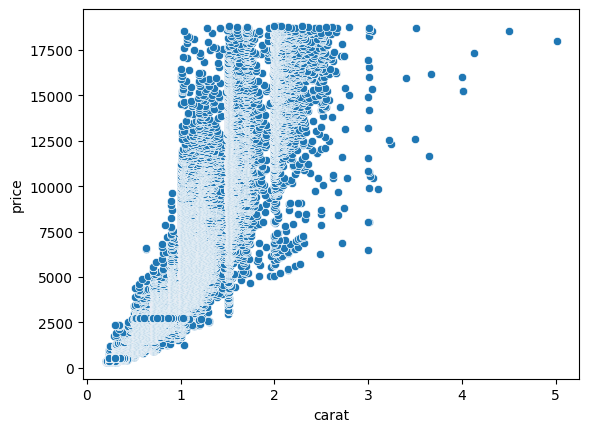

In [9]:
sb.scatterplot(x = df.carat, y = df.price)

In both graphs above, we can see that the number of carats is directly proportional to the price of the diamond!

Price of diamonds based on their color

In [11]:
fig = px.box(df, x = "cut",
             y = "price",
             color = "color")
fig.show()

Price of diamonds based on their clarity

In [12]:
fig = px.box(df,
             x = "cut",
             y = "price",
             color = "clarity")
fig.show()

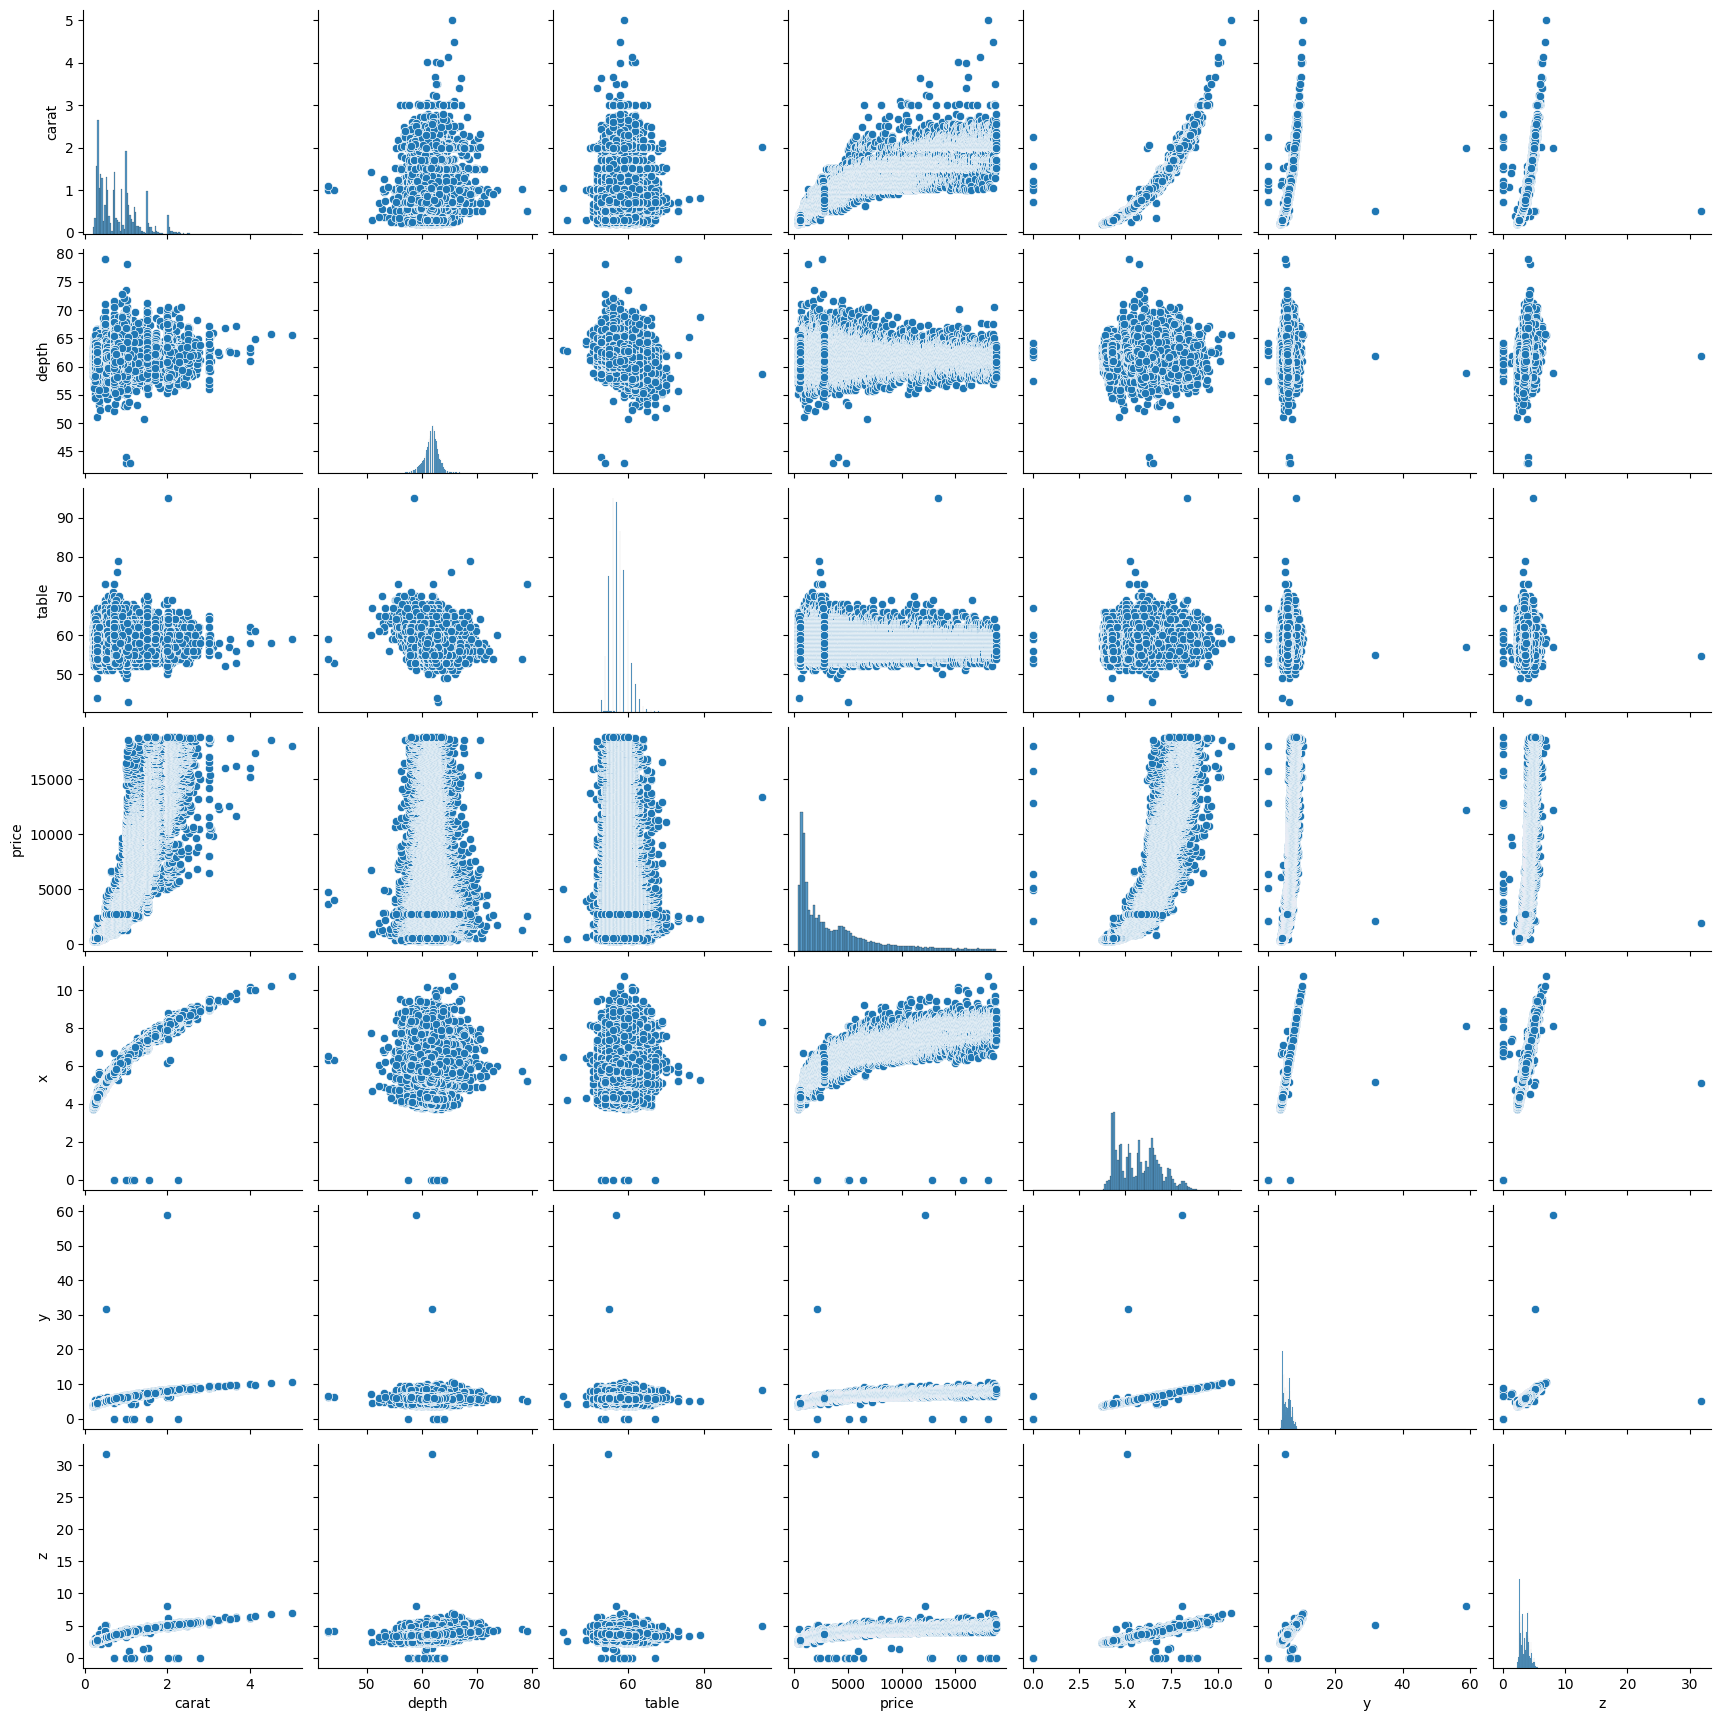

In [10]:
sb.pairplot(df)

Removing outliers

In [14]:
df.query("z>10 or y>10")

carat        cut color clarity  depth  table  price      x      y  \
24067   2.00    Premium     H     SI2   58.9   57.0  12210   8.09  58.90   
25998   4.01    Premium     I      I1   61.0   61.0  15223  10.14  10.10   
27415   5.01       Fair     J      I1   65.5   59.0  18018  10.74  10.54   
27630   4.50       Fair     J      I1   65.8   58.0  18531  10.23  10.16   
48410   0.51  Very Good     E     VS1   61.8   54.7   1970   5.12   5.15   
49189   0.51      Ideal     E     VS1   61.8   55.0   2075   5.15  31.80   

           z  
24067   8.06  
25998   6.17  
27415   6.98  
27630   6.72  
48410  31.80  
49189   5.12

In [15]:
df.drop(df.query("z>10 or y>10").index, inplace = True)


In [16]:
df.query("x==0 or y==0 or z==0")

carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27112   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27503   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27739   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51506   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

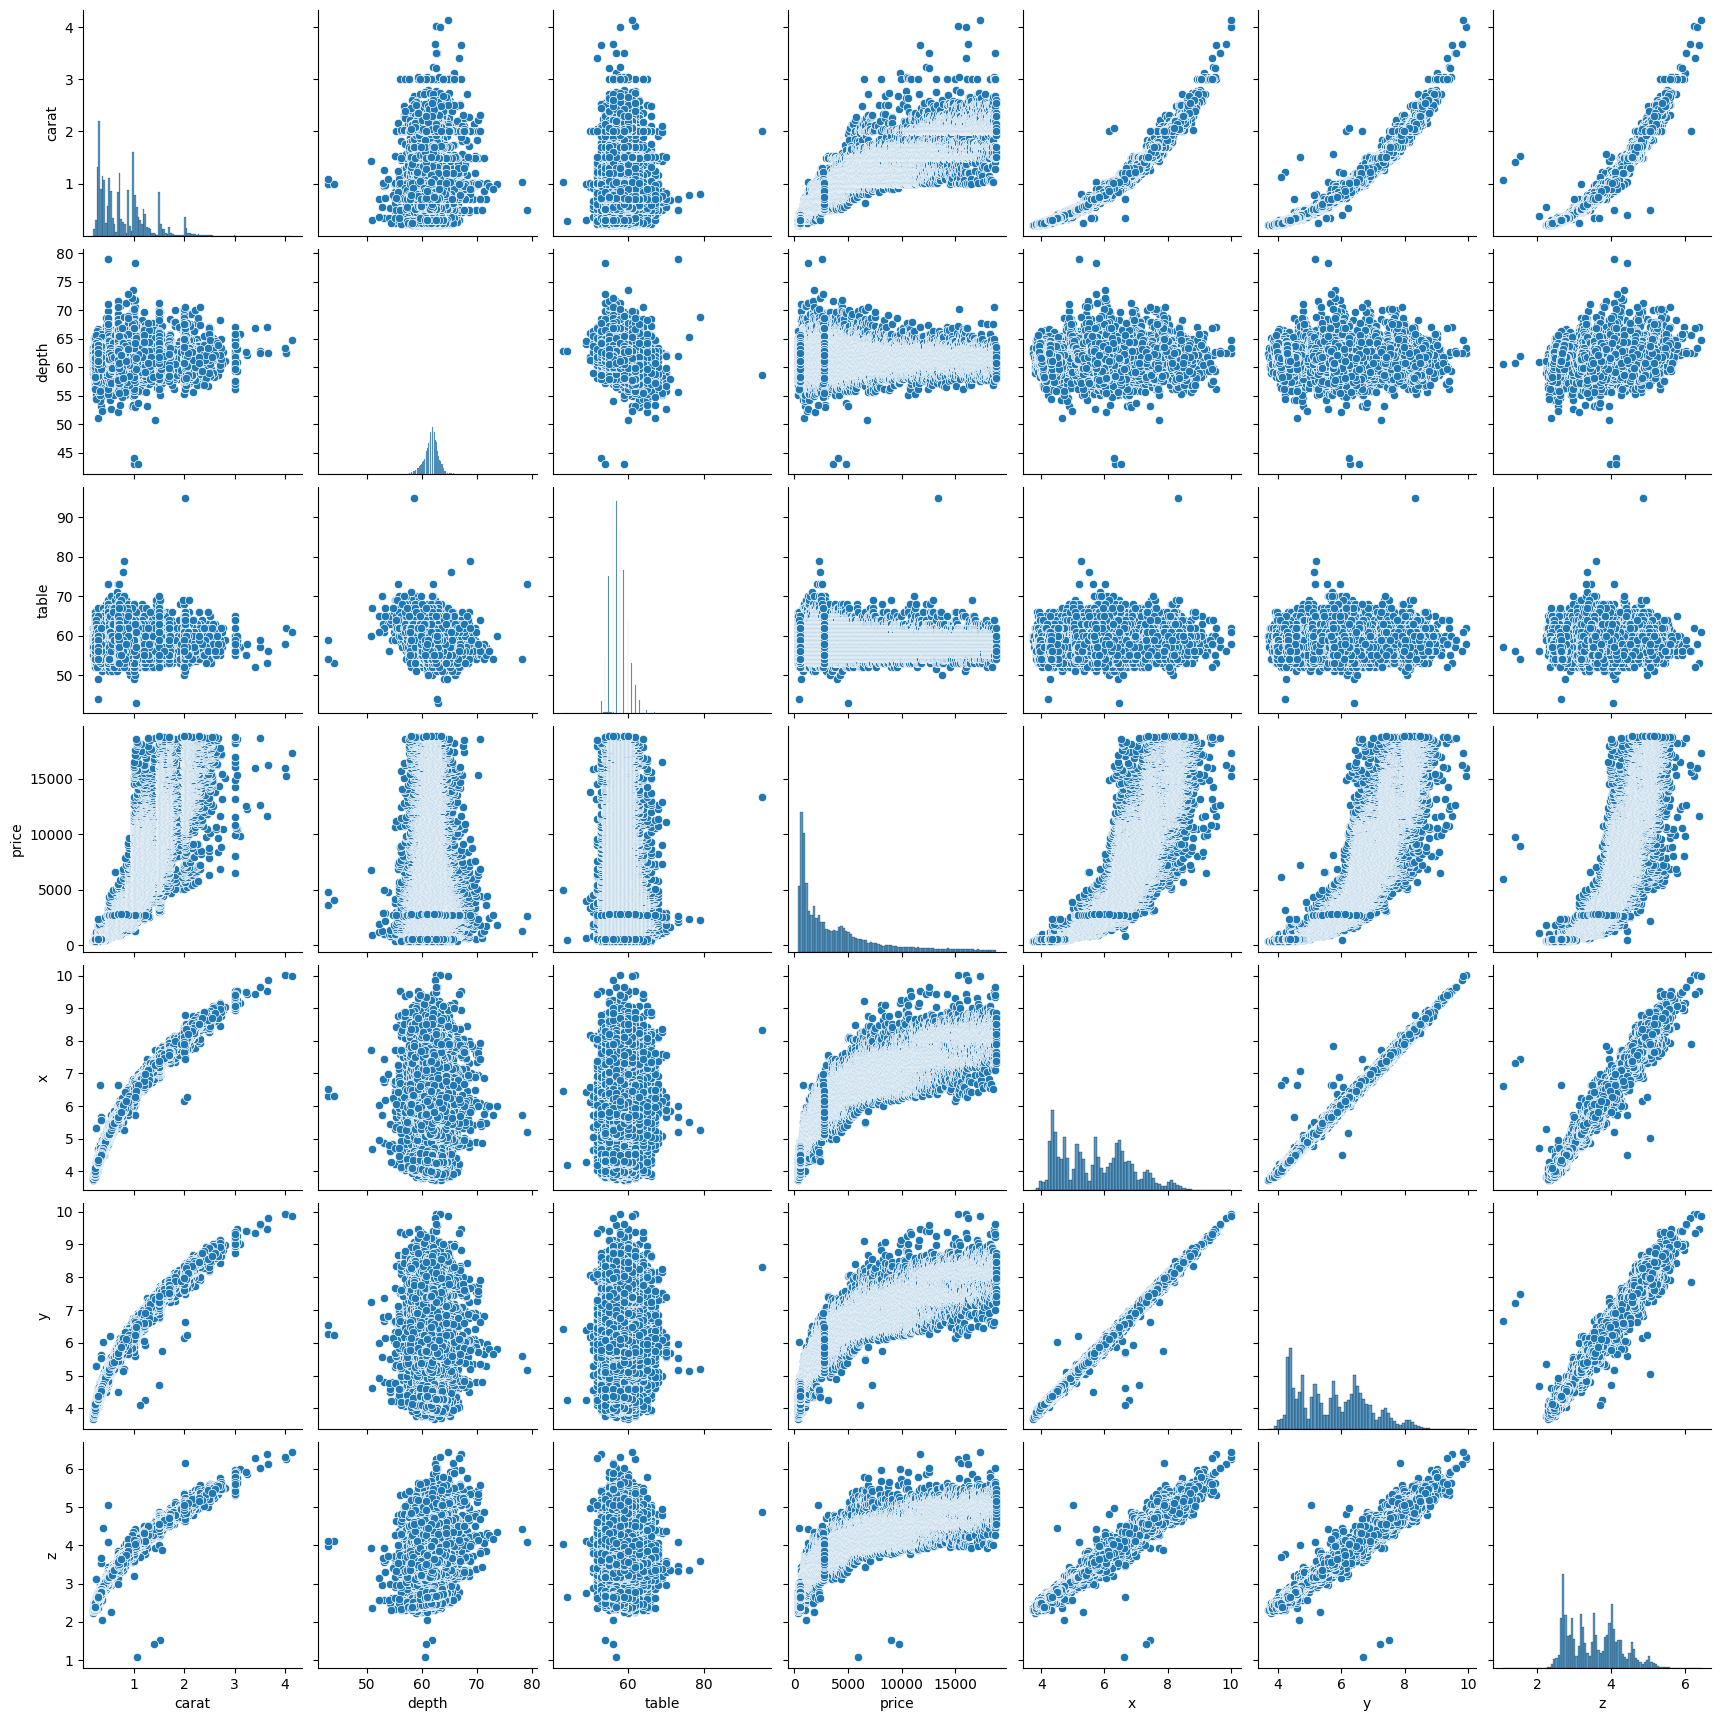

In [18]:
df.drop(df.query("x == 0 or y == 0 or z == 0").index, inplace = True)
sb.pairplot(df)

Feature engineering

In [19]:
df['size'] = df.x * df.y * df.z
df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

        size  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250

Correlation between prices and other features

In [20]:
corr = df.corr()
print(corr["price"].sort_values(ascending = False))

price    1.000000
size     0.923904
carat    0.921998
y        0.888749
x        0.887152
z        0.882040
table    0.127140
depth   -0.010994
Name: price, dtype: float64


<ipython-input-20-5ea364486b9f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Replacing values in columns with numerical values

In [21]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [22]:
df.cut.replace({'Ideal':5,
                'Premium':4,
                'Good':2,
                'Very Good':3,
                'Fair':1}, inplace = True)
df.head()

carat  cut color clarity  depth  table  price     x     y     z       size
0   0.23    5     E     SI2   61.5   55.0    326  3.95  3.98  2.43  38.202030
1   0.21    4     E     SI1   59.8   61.0    326  3.89  3.84  2.31  34.505856
2   0.23    2     E     VS1   56.9   65.0    327  4.05  4.07  2.31  38.076885
3   0.29    4     I     VS2   62.4   58.0    334  4.20  4.23  2.63  46.724580
4   0.31    2     J     SI2   63.3   58.0    335  4.34  4.35  2.75  51.917250

In [23]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [24]:
df.color.replace({'E':2,'I':6,'J':7,'H':5,'F':3,'G':4,'D':1},
                 inplace = True)
df.head

<bound method NDFrame.head of        carat  cut  color clarity  depth  table  price     x     y     z  \
0       0.23    5      2     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    4      2     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23    2      2     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    4      6     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31    2      7     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...  ...    ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72    5      1     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72    2      1     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70    3      1     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    4      5     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75    5      1     SI2   62.2   55.0   2757  5.83  5.87  3.64   

             size  
0       38.202030  
1       34.505856  
2       3

In [25]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [26]:
df.clarity.replace({'SI2':1, 'SI1':2, 'VS1':3, 'VS2':4, 'VVS2':5, 'VVS1':6, 'I1':7, 'IF':8},
                   inplace=True)
df.head()

carat  cut  color  clarity  depth  table  price     x     y     z  \
0   0.23    5      2        1   61.5   55.0    326  3.95  3.98  2.43   
1   0.21    4      2        2   59.8   61.0    326  3.89  3.84  2.31   
2   0.23    2      2        3   56.9   65.0    327  4.05  4.07  2.31   
3   0.29    4      6        4   62.4   58.0    334  4.20  4.23  2.63   
4   0.31    2      7        1   63.3   58.0    335  4.34  4.35  2.75   

        size  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250

In [27]:
df.drop(['x','y','z'], axis = 1, inplace = True)
df.head()

carat  cut  color  clarity  depth  table  price       size
0   0.23    5      2        1   61.5   55.0    326  38.202030
1   0.21    4      2        2   59.8   61.0    326  34.505856
2   0.23    2      2        3   56.9   65.0    327  38.076885
3   0.29    4      6        4   62.4   58.0    334  46.724580
4   0.31    2      7        1   63.3   58.0    335  51.917250

Splitting the data into test and train sets

In [30]:
X = df.drop(['price'], axis = 1)
X.head()

carat  cut  color  clarity  depth  table       size
0   0.23    5      2        1   61.5   55.0  38.202030
1   0.21    4      2        2   59.8   61.0  34.505856
2   0.23    2      2        3   56.9   65.0  38.076885
3   0.29    4      6        4   62.4   58.0  46.724580
4   0.31    2      7        1   63.3   58.0  51.917250

In [31]:
y = df['price']
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42 )

Training and building a Random Forest Regressor model

In [33]:
import sklearn.ensemble as se
rf = se.RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
print('R squared of the Random Forest Regressor on training set: {:.2%}'.format(rf.score(X_train, y_train)))
print('R squared of the Random Forest Regressor on test set: {:.2%}'.format(rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.72%
R squared of the Random Forest Regressor on test set: 98.14%


Note that just because the Rsquared on the training set is a little higher that the one on the test set does not mean the model is overfitting. It is doing just fine :)
Also,98.15% of the variability in the prices can be well explained using the 7 chosen features!

<Axes: xlabel='price'>

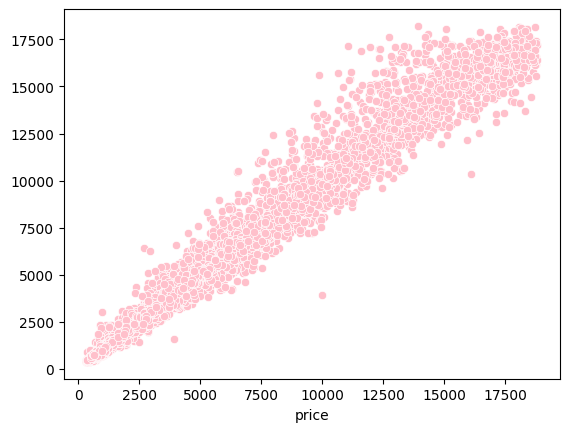

In [35]:
y_pred = rf.predict(X_test)
sb.scatterplot(x = y_test, y= y_pred, color = 'pink')

Evaluating Rndom Forest Regressor model

In [36]:
d = {'real' : y_test, 'predicted': y_pred }
df_rf = pd.DataFrame(data = d)
df_rf['diff'] = df_rf['predicted'] - df_rf['real']
df_rf

real     predicted         diff
35813    914    919.685000     5.685000
3521    3405   2951.720000  -453.280000
42347   1299    986.463333  -312.536667
25602  14456  15534.850000  1078.850000
9153    4540   5252.150000   712.150000
...      ...           ...          ...
53370   2658   2394.060000  -263.940000
47476   1861   1861.680000     0.680000
13818   5630   5785.190000   155.190000
10163   4729   5192.800000   463.800000
16590   6626   6588.350000   -37.650000

[17792 rows x 3 columns]

Calculating Mean Absolute Error of the model

In [39]:
import sklearn.metrics as mt
print('Mean Absolute Error of the Random Forest Regressor on test set is {:.2f}'.format(mt.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error of the Random Forest Regressor on test set is 277.00


The model was able to predict the price of every diamond in the test set with an error of +/_ $277 of the actual price

Calculate the Mean Squared Log Error

In [41]:
print('Mean Squared Log Error of the Random Forest Regressor on test set is {:.2%}'.format(mt.mean_squared_log_error(y_test,y_pred)))

Mean Squared Log Error of the Random Forest Regressor on test set is 1.25%


The random forest regressor model was able  to predict the price of every diamond in the test set with an error of ± 1.25% of the real price.

In [46]:
print("Diamond Price Prediction")
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = int(input("Color()"))
d = int(input("Clarity"))
e = float(input("Depth"))
f = float(input("Table"))
g = float(input("Size: "))
features = [a, b, c, d, e, f, g]

prediction = rf.predict([features]) [0]
#print("Predicted Diamond's Price = ", rf.predict(features))
print("\033[1m The market price of this new diamond is ${:.2f}".format(prediction))

Diamond Price Prediction
Carat Size: 0.23
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 5
Color()2
Clarity1
Depth61.5
Table55.0
Size: 38.2
 The market price of this new diamond is $382.34


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

